In [1]:
import datetime
import numpy as np
import pandas as pd
import random

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator

%matplotlib inline

import vasu
import vasu_strategy as strategy

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
STOCK_NAME = 'HDFC Bank'
STOCK_PRICE_FILE = './../database/500180.csv'

In [3]:
price_data = pd.read_csv(STOCK_PRICE_FILE,index_col = 0, parse_dates = True,
                             usecols = [u'Date',u'Open Price', u'High Price', u'Low Price', u'Close Price'],
                             dtype= {u'Open Price':np.float64,u'High Price':np.float64,
                                     u'Low Price':np.float64,u'Close Price':np.float64}).sort_index()

In [28]:
sample_data = price_data.loc[datetime.date(year=2017,month=3,day=18):datetime.date(year=2017,month=7,day=4)]

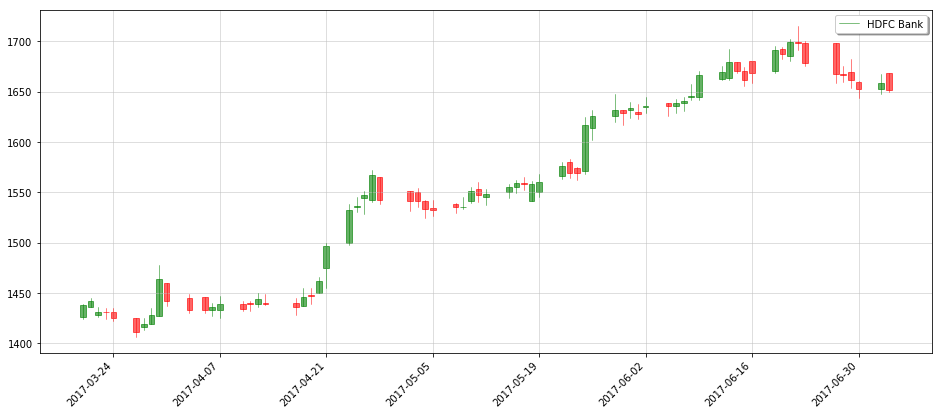

In [29]:
vasu.plot_candlestic(sample_data,STOCK_NAME)

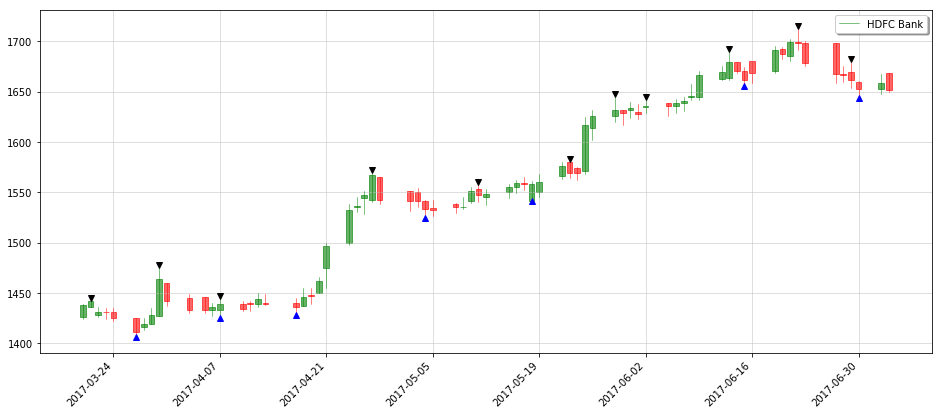

In [30]:
peak_indices = vasu.get_peak_indices(sample_data)
trough_indices = vasu.get_trough_indices(sample_data)
vasu.plot_candlestic_with_extrema(sample_data,peak_indices,trough_indices,STOCK_NAME)

In [31]:
trend_data = vasu.get_trend_data(sample_data)
train_data,test_data = vasu.split_data(trend_data)

In [46]:
signal_dict = strategy.detect_bullish_continuation(train_data,test_data)
benchamark_date = signal_dict['benchmark_date']
benchamark_price = signal_dict['benchmark_price']
if 'entry_date' in signal_dict:
    signal_date = signal_dict['entry_date']
    benchmark_data = train_data.loc[benchamark_date:].head(1)
    signal_data = test_data.loc[signal_date:].head(1)
else:
    print('no signal found!')

no signal found!
